In [2]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, merge, Input, concatenate, add
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.models import model_from_json
from keras import backend as K
from keras.preprocessing import image
from keras.optimizers import SGD, RMSprop
from keras.utils.data_utils import get_file
import random
from keras.applications import VGG16, ResNet50, VGG19
import os
import itertools
from sklearn.metrics import log_loss, confusion_matrix
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.simplefilter("ignore", UserWarning)

# 2 -c

## Data augmentation 

Sim, a utilização de Data augmentation ajudará a nivelar mais as classes que estão em menor tamnho uma vez que estamos fazendo algumas transformações nas imagens de treino, fazendo assim o modelo não "ver" a mesma imagem duas vezes. A classe maggie_simpson tinha 128 imagens, depois do processo ela ficou com 1056. Não aumentei mais para que não ficasse em vantagem em relação as outras classes.

In [3]:
from keras.preprocessing.image import ImageDataGenerator
image_width = 150
image_height = 150

img_rows =  224
img_cols =  224
image_size = (image_width, image_height)

data_datagen = ImageDataGenerator(rescale=1.0/255,  validation_split=0.15, rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

train_generator = data_datagen.flow_from_directory(
        'simpsons_dataset11/simpsons_dataset11/',  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=16,
        class_mode='categorical',
         subset='training')

validation_generator = data_datagen.flow_from_directory(
        'simpsons_dataset11/simpsons_dataset11/',  
        target_size=image_size,  
        batch_size=16,
        class_mode='categorical',
         subset='validation')




Found 12643 images belonging to 11 classes.
Found 2224 images belonging to 11 classes.


In [12]:
def create_model(p):
    model = Sequential()
    model.add(Conv2D(filters=100, kernel_size=(5,5), activation='relu', input_shape=(150,150,3)))
    model.add(Conv2D(filters=100, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(p))
    model.add(Flatten())
    model.add(Dense(units= 64, activation='relu'))
    model.add(Dense(units=11, activation='softmax'))
    return model

In [17]:
def compile_model(model,lr, epochs):
    model.compile(optimizer=RMSprop(lr=lr),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

    N_TRAIN = 11854
    N_VAL = 2085 
    history = small_model.fit_generator(
        train_generator,
        steps_per_epoch=(N_TRAIN // 32),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=(N_VAL // 32))
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend(loc='best')

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc='best');

In [14]:
small_model = create_model(0)

small_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 71, 71, 100)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 504100)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32262464  
_________________________________________________________________
dense_4 (Dense)              (None, 11)                715       
Total para

Epoch 1/50
370/370 [==============================] - 99s 268ms/step - loss: 14.6081 - acc: 0.0917 - val_loss: 14.6768 - val_acc: 0.0894
Epoch 2/50
370/370 [==============================] - 91s 246ms/step - loss: 14.7999 - acc: 0.0818 - val_loss: 14.7553 - val_acc: 0.0845
Epoch 3/50
370/370 [==============================] - 88s 238ms/step - loss: 14.6833 - acc: 0.0890 - val_loss: 14.7233 - val_acc: 0.0865
Epoch 4/50
370/370 [==============================] - 88s 237ms/step - loss: 14.7645 - acc: 0.0840 - val_loss: 14.7240 - val_acc: 0.0865
Epoch 5/50
370/370 [==============================] - 87s 236ms/step - loss: 14.6833 - acc: 0.0890 - val_loss: 14.5993 - val_acc: 0.0942
Epoch 6/50
370/370 [==============================] - 87s 235ms/step - loss: 14.7622 - acc: 0.0841 - val_loss: 14.8493 - val_acc: 0.0787
Epoch 7/50
370/370 [==============================] - 87s 235ms/step - loss: 14.6774 - acc: 0.0894 - val_loss: 14.7233 - val_acc: 0.0865
Epoch 8/50
370/370 [=====================

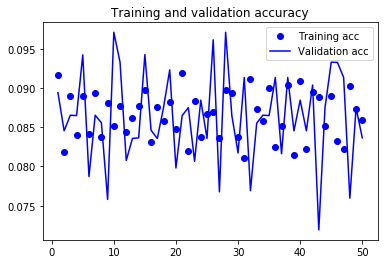

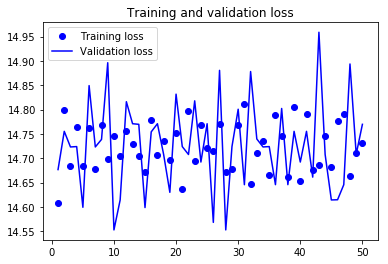

In [15]:
compile_model(0.001, 50)

# (2D) Dropout = 0.1, lr = 0.001

Epoch 1/50
370/370 [==============================] - 88s 237ms/step - loss: 14.8054 - acc: 0.0814 - val_loss: 14.7240 - val_acc: 0.0865
Epoch 2/50
370/370 [==============================] - 87s 235ms/step - loss: 14.6479 - acc: 0.0912 - val_loss: 14.7233 - val_acc: 0.0865
Epoch 3/50
370/370 [==============================] - 87s 235ms/step - loss: 14.7533 - acc: 0.0847 - val_loss: 14.6457 - val_acc: 0.0914
Epoch 4/50
370/370 [==============================] - 87s 235ms/step - loss: 14.6669 - acc: 0.0900 - val_loss: 14.8162 - val_acc: 0.0808
Epoch 5/50
370/370 [==============================] - 87s 235ms/step - loss: 14.7513 - acc: 0.0848 - val_loss: 14.6300 - val_acc: 0.0923
Epoch 6/50
370/370 [==============================] - 87s 234ms/step - loss: 14.7132 - acc: 0.0872 - val_loss: 14.9247 - val_acc: 0.0740
Epoch 7/50
370/370 [==============================] - 86s 234ms/step - loss: 14.6941 - acc: 0.0883 - val_loss: 14.7397 - val_acc: 0.0855
Epoch 8/50
370/370 [=====================

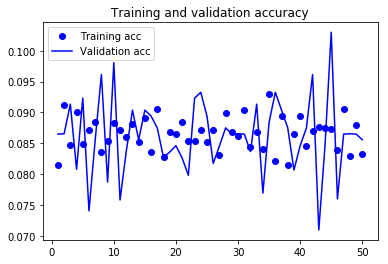

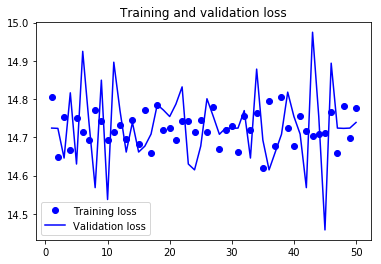

In [18]:
model_01 =  create_model(0.1)
compile_model(model_01, 0.001, 50)


# (2D) Dropout = 0.3 , lr = 0.001

Epoch 1/50
370/370 [==============================] - 88s 238ms/step - loss: 14.6475 - acc: 0.0912 - val_loss: 14.5987 - val_acc: 0.0943
Epoch 2/50
370/370 [==============================] - 87s 235ms/step - loss: 14.7622 - acc: 0.0841 - val_loss: 14.8317 - val_acc: 0.0798
Epoch 3/50
370/370 [==============================] - 87s 235ms/step - loss: 14.7785 - acc: 0.0831 - val_loss: 14.7867 - val_acc: 0.0826
Epoch 4/50
370/370 [==============================] - 87s 235ms/step - loss: 14.6833 - acc: 0.0890 - val_loss: 14.5218 - val_acc: 0.0990
Epoch 5/50
370/370 [==============================] - 87s 235ms/step - loss: 14.6588 - acc: 0.0905 - val_loss: 14.8650 - val_acc: 0.0777
Epoch 6/50
370/370 [==============================] - 87s 235ms/step - loss: 14.7677 - acc: 0.0838 - val_loss: 14.6768 - val_acc: 0.0894
Epoch 7/50
370/370 [==============================] - 87s 236ms/step - loss: 14.7867 - acc: 0.0826 - val_loss: 14.6770 - val_acc: 0.0894
Epoch 8/50
370/370 [=====================

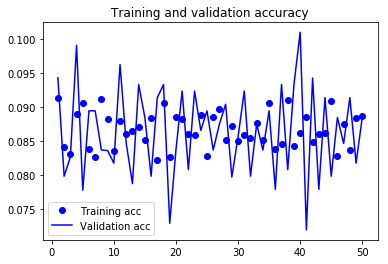

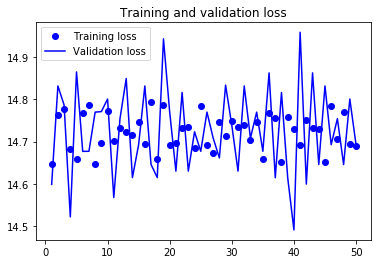

In [19]:
model_01 =  create_model(0.3)
compile_model(model_01, 0.001, 50)

# (2D) Dropout = 0.5 , lr = 0.001

Epoch 1/50
370/370 [==============================] - 88s 239ms/step - loss: 14.7537 - acc: 0.0847 - val_loss: 14.6923 - val_acc: 0.0885
Epoch 2/50
370/370 [==============================] - 87s 235ms/step - loss: 14.7323 - acc: 0.0860 - val_loss: 14.7710 - val_acc: 0.0836
Epoch 3/50
370/370 [==============================] - 87s 235ms/step - loss: 14.7101 - acc: 0.0874 - val_loss: 14.6923 - val_acc: 0.0885
Epoch 4/50
370/370 [==============================] - 87s 235ms/step - loss: 14.7105 - acc: 0.0873 - val_loss: 14.7397 - val_acc: 0.0855
Epoch 5/50
370/370 [==============================] - 87s 234ms/step - loss: 14.7241 - acc: 0.0865 - val_loss: 14.7078 - val_acc: 0.0875
Epoch 6/50
370/370 [==============================] - 87s 235ms/step - loss: 14.7350 - acc: 0.0858 - val_loss: 14.9590 - val_acc: 0.0719
Epoch 7/50
370/370 [==============================] - 87s 235ms/step - loss: 14.7389 - acc: 0.0856 - val_loss: 14.5373 - val_acc: 0.0981
Epoch 8/50
370/370 [=====================

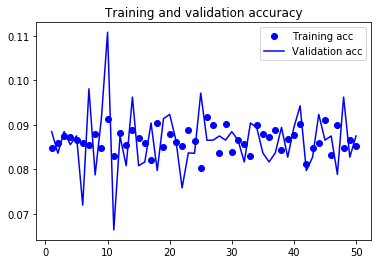

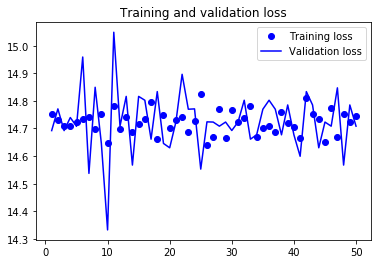

In [20]:
model_01 =  create_model(0.5)
compile_model(model_01, 0.001, 50)

### Comparativo com o ítem 2B

A técnica de Dropout é uma forma de reduzir o overfitting que, nesse caso  não está acontencendo. Na verdade está contencendo um Underfitting que é um modelo de baixo desempenho no treinamente e consequentemente terá um resultado ruim no teste.
